<a href="https://colab.research.google.com/github/Suriyakrishnansuriya/Heart_failure_prediction/blob/main/Heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart failure prediction**

In [105]:
# import necessory libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [3]:
data= pd.read_csv('heart_failure_clinical_records_dataset.csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [8]:
# age columns float type to int type change
data['age']= data['age'].astype(int)

In [9]:
data.describe

<bound method NDFrame.describe of      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0     75        0                       582         0                 20   
1     55        0                      7861         0                 38   
2     65        0                       146         0                 20   
3     50        1                       111         0                 20   
4     65        1                       160         1                 20   
..   ...      ...                       ...       ...                ...   
294   62        0                        61         1                 38   
295   55        0                      1820         0                 38   
296   45        0                      2060         1                 60   
297   45        0                      2413         0                 38   
298   50        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine

In [10]:
#check if any null values are there
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
# checking if any duplicated values are there
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [17]:
# to segregate the data into male and female
female= data[data['sex']==0]
female

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
8,65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
14,49,1,80,0,30,1,427000.00,1.0,138,0,0,12,0
18,70,1,125,0,25,1,237000.00,1.0,140,0,0,15,1
19,48,1,582,1,55,0,87000.00,1.9,121,0,0,15,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,65,0,892,1,35,0,263358.03,1.1,142,0,0,256,0
289,90,1,337,0,38,0,390000.00,0.9,144,0,0,256,0
290,45,0,615,1,55,0,222000.00,0.8,141,0,0,257,0
295,55,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0


In [18]:
male= data[data['sex']==1]
male

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
5,90,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52,0,190,1,38,0,382000.00,1.0,140,1,1,258,0
293,63,1,103,1,35,0,179000.00,0.9,136,1,1,270,0
294,62,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
297,45,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [36]:
# to calculate how many percentage of deaths in the data depends on the 'sex'

print('male :',len(data[data['sex']==1])/len(['sex']))
print('female :',len(data[data['sex']==0])/len(['sex']))


male= (len(data[data['sex']==1])/len(['sex']))*100/ len(data['sex'])
female= len(data[data['sex']==0])/len(['sex'])*100/ len(data['sex'])

print('male :', male,'%' )
print('female :', female,'%' )

male : 194.0
female : 105.0
male : 64.88294314381271 %
female : 35.11705685618729 %


In [40]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

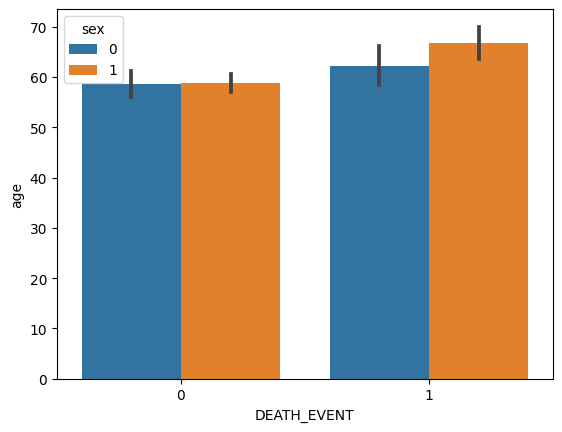

In [49]:
sns.barplot(data, x='DEATH_EVENT', y='age', hue='sex')
plt.show()

In [71]:
# to fit the model PCA
pca= PCA()
pca_feature= pca.fit_transform(data)
pca_feature.shape

(299, 13)

In [72]:
pca.explained_variance_

array([9.56566931e+09, 9.40896934e+05, 6.03051369e+03, 1.46439944e+02,
       1.25996928e+02, 1.85350273e+01, 1.00341845e+00, 3.50050083e-01,
       2.30789099e-01, 2.22977936e-01, 1.96016707e-01, 1.28659588e-01,
       1.16543843e-01])

<BarContainer object of 13 artists>

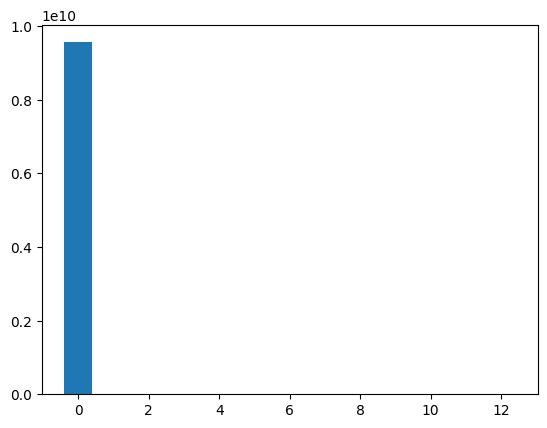

In [74]:
# applied PCA to how many variance data
plt.bar(range(13), pca.explained_variance_)

In [77]:
#assig to x and y
x=data.drop(['DEATH_EVENT'],axis=1)
y= data['DEATH_EVENT']


In [78]:
X_train,X_test,y_train,y_test= train_test_split(x,y, test_size=0.2)


In [99]:
# to predict using Logistic regression
pipe_lr= Pipeline(steps=[('std', StandardScaler()),('lr', LogisticRegression())], verbose=True)
pipe_lr.fit(X_train, y_train)
print(pipe_lr.score(X_test, y_test),'\n-----------------------------------------------------------------------')

print(f1_score(y_test, pipe_lr.predict(X_test)))


[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
0.8 
-----------------------------------------------------------------------
0.7391304347826089


In [108]:
# to predict using Logistic regression
pipe_lr= Pipeline(steps=[('std', StandardScaler()),('lr', LogisticRegression())], verbose=True)
pipe_lr.fit(X_train, y_train)
print('LogisticRegression','\n**********************************')
print(pipe_lr.score(X_test, y_test),'\n-----------------------------------------------------------------------')

print(f1_score(y_test, pipe_lr.predict(X_test)))

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
LogisticRegression 
**********************************
0.8 
-----------------------------------------------------------------------
0.7391304347826089


In [109]:
# Randomforest classifier

pipe_rf= Pipeline(steps=[('std', StandardScaler()),('lr', RandomForestClassifier())], verbose=True)
pipe_rf.fit(X_train, y_train)
print('RandomForestClassifier','\n**********************************')
print(pipe_rf.score(X_test, y_test),'\n-----------------------------------------------------------------------')

print(f1_score(y_test, pipe_rf.predict(X_test)))

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.2s
RandomForestClassifier 
**********************************
0.9 
-----------------------------------------------------------------------
0.8749999999999999


In [110]:
# Gradientboost classifier

pipe_gb= Pipeline(steps=[('std', StandardScaler()),('lr', GradientBoostingClassifier())], verbose=True)
pipe_gb.fit(X_train, y_train)
print('GradientBoostingClassifier','\n**********************************')
print(pipe_gb.score(X_test, y_test),'\n-----------------------------------------------------------------------')

print(f1_score(y_test, pipe_gb.predict(X_test)))

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.2s
GradientBoostingClassifier 
**********************************
0.8833333333333333 
-----------------------------------------------------------------------
0.8571428571428572


In [112]:
# Decisiontree classifier

pipe_dt= Pipeline(steps=[('std', StandardScaler()),('lr', DecisionTreeClassifier())], verbose=True)
pipe_dt.fit(X_train, y_train)
print('DecisionTreeClassifier','\n**********************************')
print(pipe_dt.score(X_test, y_test),'\n-----------------------------------------------------------------------')

print(f1_score(y_test, pipe_dt.predict(X_test)))

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
DecisionTreeClassifier 
**********************************
0.8333333333333334 
-----------------------------------------------------------------------
0.8000000000000002


In [113]:
# KNeighbors classifier

pipe_kn= Pipeline(steps=[('std', StandardScaler()),('lr', KNeighborsClassifier())], verbose=True)
pipe_kn.fit(X_train, y_train)
print('KNeighborsClassifier','\n**********************************')
print(pipe_kn.score(X_test, y_test),'\n-----------------------------------------------------------------------')

print(f1_score(y_test, pipe_kn.predict(X_test)))

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing lr, total=   0.0s
KNeighborsClassifier 
**********************************
0.6833333333333333 
-----------------------------------------------------------------------
0.45714285714285713


In [116]:
print('Logistic Regression')
confusion_matrix(y_test, pipe_lr.predict(X_test))

Logistic Regression


array([[31,  4],
       [ 8, 17]])

In [118]:
print('RandomForest Classifier')
confusion_matrix(y_test, pipe_rf.predict(X_test))

RandomForest Classifier


array([[33,  2],
       [ 4, 21]])

In [119]:
print('GradientBoosting Classifier')
confusion_matrix(y_test, pipe_gb.predict(X_test))

GradientBoosting Classifier


array([[32,  3],
       [ 4, 21]])

In [120]:
print('DecisionTree Classifier')
confusion_matrix(y_test, pipe_dt.predict(X_test))

DecisionTree Classifier


array([[30,  5],
       [ 5, 20]])

In [121]:
print('KNeighbors Classifier')
confusion_matrix(y_test, pipe_kn.predict(X_test))

KNeighbors Classifier


array([[33,  2],
       [17,  8]])